In this exercise you will:
1. Write you function $f(x, y)$
2. Use gradient descent with and without momentum 
3. Using your implementation, optimize $f(x, y)$ w.r.t. the vector $[x, y]^T$. 
4. Redo step 1 and 3 to optimize a different function
5. Write a short description of the sensitivity of the two algorithms to their hyperparemeter values

After that, you're done. 
If you want more, you can try one of the following stretch goals:
1. In practice our gradient updates are often _noisy_ (see the [stochastic GD algorithm](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)). Add a small amount of noise to the gradient update. If `g=autograd.grad(f)(xy)`, this would look like `g+=.2*np.random.randn(*g.shape)` within your `get_gd_delta` and `get_gd_delta_mom` functions. How does performance of GD and GD-with-momentum respond when gradients are noisy?
2. Read the documentation of [`scipy.optimize.check_grad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.check_grad.html). Use this method to write a unit test of `autograd.grad(f)` and test it out for some non-trivial functions.
3. Read section 2 of [the Adam paper](https://arxiv.org/pdf/1412.6980.pdf). Implement Adam from scratch by following algorithm 1 or translate an existsing online implementation or tutorial into `autograd`.


In [1]:
import autograd.numpy as np
import autograd
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3)
import time

# helper function for plotting isocontours
def plot_isocontours(x_points, y_points, g):
    """
    first makes a 2d grid from the 1d grid
    then plots isocontours using the function g
    """
    X,Y = np.meshgrid(x_points, y_points)  # build 2d grid
    Z = np.zeros_like(X)
    for i in range(len(X)):
        for j in range(len(X.T)):
            Z[i, j] = g(np.array((X[i, j], Y[i, j])))  # compute function values
    fig, ax = plt.subplots()
    im = ax.contour(X, Y, Z, 100)
    plt.colorbar(im, ax=ax)
    return fig, ax

# 1a. Write your own function f(x, y) using the template below. 
x and y are represented by the 2d vector `xy` 


In [4]:
# write forward function
def f(xy):
    x, y = xy[0], xy[1]
    
    # write your own function by changing the expression below
    output = x**2 + 2.*y**2  # an easy one
    #output = x**2 + 2.*y**2 + 2.*x*y  # a weird one
    #output = np.log(x**2 + 0.25*y**2) + 0.01*x**2*y**2  # ???
    # write your own function by changing the expression above
    # remember that only convex functions have well-definied and unique global minima 
    return output

# differentiate f(x) w.r.t. x
df = autograd.grad(f)

# 1b. plot isocontours of $f(x, y)$ and $\nabla_{x, y}||f(x, y)||_2$ 

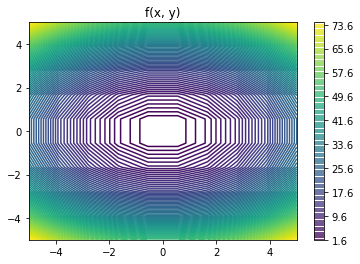

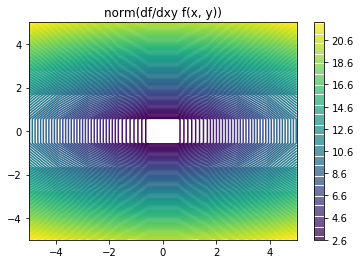

In [5]:
x_points = np.linspace(-5, 5, 10)  # optionally change the plot limits here
y_points = np.linspace(-5, 5, 10)

df_norm = lambda xy: np.sqrt(np.sum(np.square(df(xy))))

fig, ax = plot_isocontours(x_points, y_points, f)
ax.set_title('f(x, y)')
fig, ax = plot_isocontours(x_points, y_points, df_norm)
ax.set_title('norm(df/dxy f(x, y))')
plt.show()

# 2. Implement the updates for gradient descent with and without momentum using the code template provided

In [6]:
def get_gd_delta(xy, f, learning_rate):
    """
    gradient descent update
    xy <-- xy + delta
    delta depends on the current position xy, the function f, and the learning rate
    """
    # write your update code below
    #delta = -learning_rate*np.random.randn(*xy.shape) # random upates; replace me
    df = autograd.grad(f)
    delta = -learning_rate*df(xy)
    # write your update code above
    return delta


def get_gd_mom_delta(xy, f, learning_rate, prev_delta, alpha):
    """
    gradient descent with momentum update
    xy <-- xy + delta
    delta depends on the current position xy, the function f, the learning rate, the previous delta, and alpha
    """
    # write your update code below
    df = autograd.grad(f)
    delta = -learning_rate*df(xy)+alpha*prev_delta
    # write your update code above
    return delta


# 2 use your implementation to optimize f

final value f(x, y)=0.019 at (x, y)=(-0.130, 0.029)


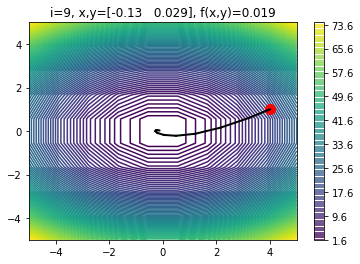

In [9]:
fig, ax = plot_isocontours(x_points, y_points, f)  # plot function isocontours

# hyperparameters
#INITIAL_VAL = np.random.randn(2)
INITIAL_VAL = np.array([4., 1.])
USE_MOMENTUM = True
LEARNING_RATE = 0.1
ALPHA = 0.5
N_ITER = 10  # see if you can reach the function minimum in as few iterations as possible

# initialize
xy = np.copy(INITIAL_VAL)
delta = np.zeros(2)
ax.plot(*xy, color='r', marker='.', ms=20)  # plot initial values

from IPython import display

for i in range(N_ITER):
#    input("Press Enter to continue...")  # optional; Enter key triggers next update
#    time.sleep(0.5)  # optional; slow down animation if the flickering is distracting

    xy_old = np.copy(xy)
    g = df(xy)  # compute standard gradient
    if USE_MOMENTUM:
        delta = get_gd_mom_delta(xy, f, LEARNING_RATE, delta, ALPHA)
    else:
        delta = get_gd_delta(xy, f, LEARNING_RATE)
    xy += delta  # update position
    
    # plot
    ax.plot([xy_old[0], xy[0]], [xy_old[1], xy[1]],'-k',lw=2)  # plot a line connecting old and new param values
    fig.canvas.draw()
    ax.set_title('i={}, x,y={}, f(x,y)={:.3f}'.format(i, xy, f(xy)))
    display.display(fig)
    display.clear_output(wait=True)

print('final value f(x, y)={:.3f} at (x, y)=({:.3f}, {:.3f})'.format(f(xy), xy[0], xy[1]))
